In [ ]:
from dall_e          import map_pixels, unmap_pixels, load_model

In [ ]:
import torch
from PIL import Image
from pathlib import Path
from fastai.basics import *
from fastai.vision.data import *
from fastai.vision.all import *
from fastai.text.all import *

In [ ]:
bs=4
path=Path('./danbooru2020')
image_path=path/'512px/'
meta=path/'meta'

In [ ]:
full_table = pd.read_pickle('fulll_table.pkl')

In [ ]:
def get_filtered_image_files(path):
    return get_image_files(path).filter(lambda p:p.stem[-2:]!='_n')
image_func=lambda x:x

In [ ]:
class BlackCrop(DisplayedTransform):
    split_idx,order = None,-1
    "Danbooru images have a black border added, can read more here: https://www.gwern.net/Danbooru2020"
    def __init__(self, table,  **kwargs):
        store_attr()
        super().__init__(**kwargs)

    def encodes(self, x:(Path)):
        x_id=int(x.stem)
        x=PILImage.create(x)
        entry = self.table[self.table.id==x_id]
        w,h=entry.image_width.item(),entry.image_height.item()
        if(w>h):
            return PILImage(x.crop((0,256-256*h/w,512,256+256*h/w)))
        else:
            return PILImage(x.crop((256-256*w/h,0,256+256*w/h,512)))
def CropImageBlock(cls=PILImage):
    "A `TransformBlock` for images of `cls`"
    return TransformBlock(type_tfms=BlackCrop(full_table), batch_tfms=IntToFloatTensor)

In [ ]:
Normalize(0.5,0.5)(torch.randn(2,3,22,22))

tensor([[[[-0.2088, -0.2045,  2.0763,  ...,  0.4156,  0.0807, -1.2087],
          [ 0.3567, -1.4751, -0.9057,  ..., -0.2752,  0.7343,  0.4708],
          [-1.2972,  0.5742,  1.3291,  ..., -0.0335, -0.4476,  0.1008],
          ...,
          [ 0.9737, -0.7635, -0.1437,  ...,  1.6635,  0.2360, -0.4316],
          [-0.6215,  0.2440,  2.3908,  ..., -0.0736, -1.3821, -0.0906],
          [ 1.4254,  1.7585, -1.9605,  ..., -3.4075,  1.0615,  0.8510]],

         [[ 1.3241,  1.2317, -0.8963,  ...,  0.6670,  1.3326,  0.0344],
          [ 1.2162,  0.7887,  1.2230,  ..., -0.4863, -0.0098, -0.3951],
          [-1.6632,  0.7726, -2.2883,  ..., -0.5967, -0.8726, -0.2394],
          ...,
          [ 1.2623, -1.4708,  0.3612,  ...,  1.2531, -0.6795,  0.0586],
          [-0.6247, -1.2185,  2.3248,  ...,  1.4720, -2.0571, -0.3423],
          [-0.1737,  1.1344, -0.5324,  ..., -0.4756, -0.2755, -0.0556]],

         [[ 1.4766,  0.7401, -0.5109,  ...,  1.0319,  0.0090,  0.7008],
          [-0.5667,  0.4317,  

In [ ]:
(0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711)

In [ ]:
dblock = DataBlock(blocks    = (CropImageBlock, CropImageBlock),
                   get_items = get_filtered_image_files,
                   get_x     = [image_func],
                   get_y     = image_func,
                   splitter  = RandomSplitter(),
                   n_inp=1,
                   item_tfms = Resize(224),
                   batch_tfms=aug_transforms()+[Normalize.from_stats((0., 0., 0.), (1, 1., 1.))]
                  )

In [ ]:
dls=dblock.dataloaders(image_path, bs=bs)

In [ ]:
logit(torch.tensor(254/255))-logit(torch.tensor(253/255)),logit(torch.tensor(254/255))

(tensor(0.6971), tensor(5.5373))

In [ ]:
logit(torch.tensor(254/255))

tensor(5.5373)

In [ ]:
torch.randn(256*256*3*64).max()

tensor(5.2072)

In [ ]:
t=torch.rand(100)
t=logit(t)
t.mean(),t.std()

(tensor(0.1781), tensor(1.6972))

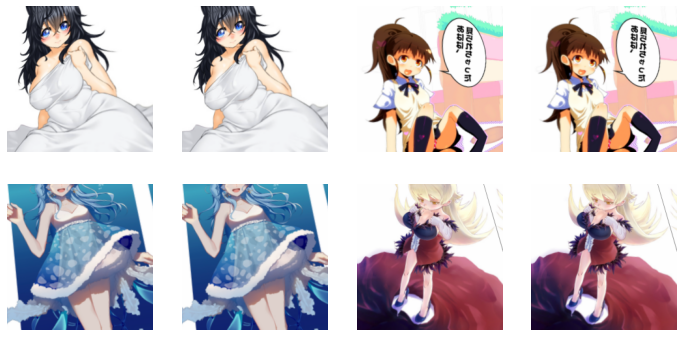

In [ ]:
dls.show_batch()

In [ ]:
dls.one_batch()

(TensorImage([[[[1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
            1.0000e+00, 1.0000e+00],
           [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
            1.0000e+00, 1.0000e+00],
           [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
            1.0000e+00, 1.0000e+00],
           ...,
           [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
            1.0000e+00, 1.0000e+00],
           [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
            1.0000e+00, 1.0000e+00],
           [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
            1.0000e+00, 1.0000e+00]],
 
          [[1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
            1.0000e+00, 1.0000e+00],
           [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
            1.0000e+00, 1.0000e+00],
           [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
            1.0000e+00, 1.0000e+00],
           ...,
           [1.0000e+00, 1.0000e+0

In [ ]:
encoder_path=download_data("https://cdn.openai.com/dall-e/encoder.pkl","dalle_encoder.pkl")
decoder_path=download_data("https://cdn.openai.com/dall-e/decoder.pkl","dalle_decoder.pkl")
with open(encoder_path, 'rb') as f: encoder=torch.load(encoder_path, map_location=torch.device('cuda:0'))
with open(decoder_path, 'rb') as f: decoder=torch.load(decoder_path, map_location=torch.device('cuda:0'))

In [ ]:
x=map_pixels(dls.one_batch()[0])

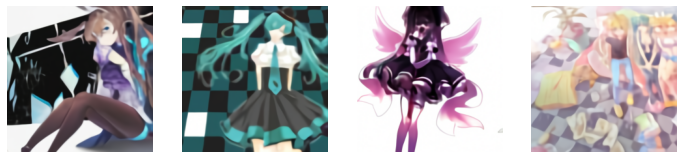

In [ ]:
z_logits = encoder(x)
z = torch.argmax(z_logits, axis=1)
z = F.one_hot(z, num_classes=encoder.vocab_size).permute(0, 3, 1, 2).float()

x_stats = decoder(z).float()
x_rec = unmap_pixels(torch.sigmoid(x_stats[:, :3]))
show_images(x_rec)

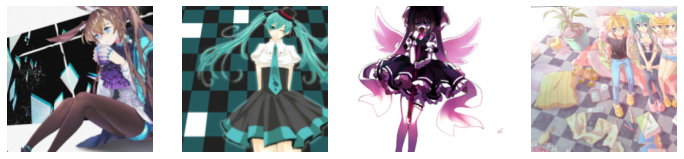

In [ ]:
show_images(unmap_pixels(x))

In [ ]:
z_logits.shape,z.shape

(torch.Size([4, 8192, 28, 28]), torch.Size([4, 8192, 28, 28]))

In [ ]:
global_step = 0
temp = 1.

for epoch in range(EPOCHS):
    for i, (images, _) in enumerate(distr_dl):
        images = images.cuda()

        loss, recons = distr_vae(
            images,
            return_loss = True,
            return_recons = True,
            temp = temp
        )

        distr_opt.zero_grad()
        loss.backward()
        distr_opt.step()

        logs = {}

        if i % 100 == 0:

            save_model(f'./vae.pt')

            # temperature anneal

            temp = max(temp * math.exp(-ANNEAL_RATE * global_step), TEMP_MIN)

            # lr decay

        # Collective loss, averaged
        avg_loss = distr_backend.average_all(loss)
        global_step += 1